,date,consumption_m3,temp,humidity,wind,weekday,hour,is_weekend,lag1
count,23,23.000000,23.000000,23.000000,23.000000,23.0,23.00000,23.0,23.000000
mean,2024-01-01 12:00:00,366.260870,30.521739,56.521739,13.608696,0.0,12.00000,0.0,366.347826
min,2024-01-01 01:00:00,241.000000,27.000000,47.000000,10.000000,0.0,1.00000,0.0,241.000000
25%,2024-01-01 06:30:00,310.000000,28.000000,51.000000,12.000000,0.0,6.50000,0.0,311.000000
50%,2024-01-01 12:00:00,370.000000,30.000000,58.000000,14.000000,0.0,12.00000,0.0,370.000000
75%,2024-01-01 17:30:00,430.000000,33.000000,61.000000,15.000000,0.0,17.50000,0.0,430.000000
max,2024-01-01 23:00:00,460.000000,35.000000,65.000000,18.000000,0.0,23.00000,0.0,460.000000
std,NaN,72.628705,2.711416,5.884259,1.947939,0.0,6.78233,0.0,72.559448


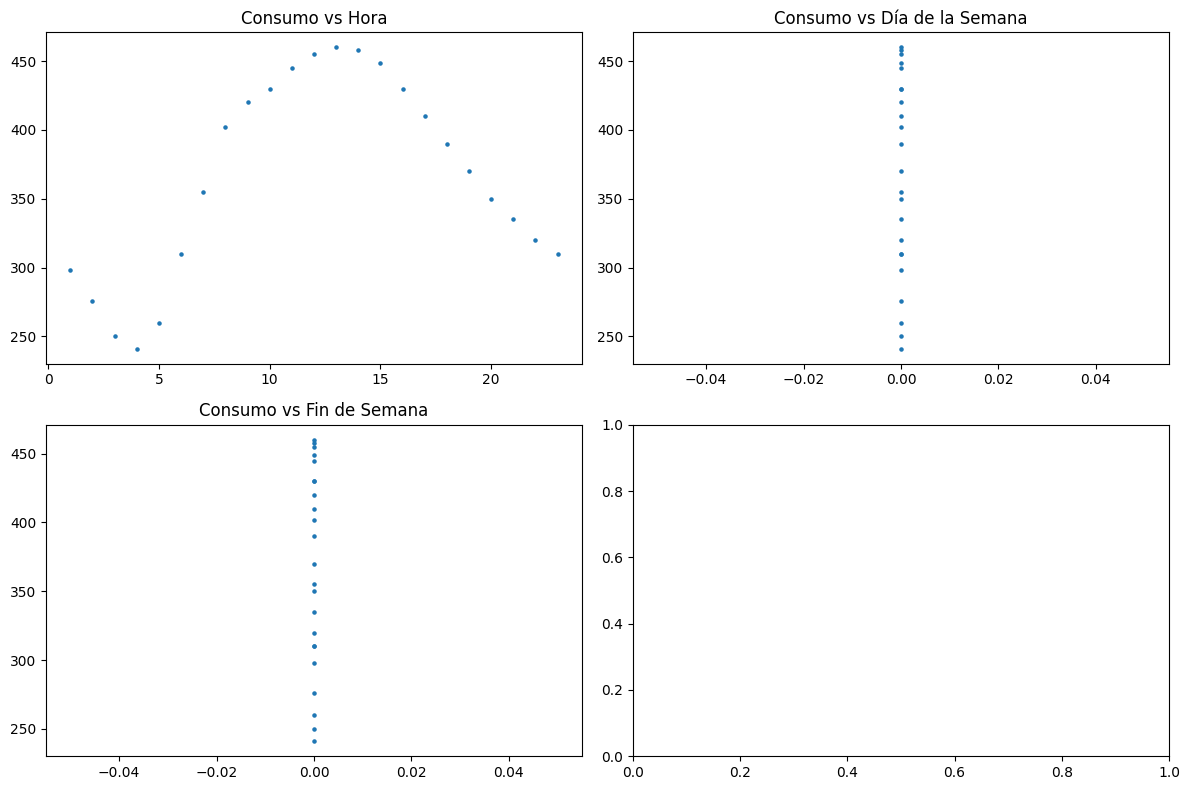

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv("../data/raw/gas_consumption.csv", parse_dates=["date"])

# Crear features
df["hour"] = df["date"].dt.hour
df["weekday"] = df["date"].dt.weekday
df["is_weekend"] = (df["weekday"] >= 5).astype(int)
df["lag1"] = df["consumption_m3"].shift(1)
# df["lag24"] = df["consumption_m3"].shift(24)

# Drop nulos que genera el shift
df = df.dropna().reset_index(drop=True)

# Estadísticas
display(df.describe())

# Gráficos para ver las nuevas features vs consumo
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

axes[0].scatter(df["hour"], df["consumption_m3"], s=5)
axes[0].set_title("Consumo vs Hora")

axes[1].scatter(df["weekday"], df["consumption_m3"], s=5)
axes[1].set_title("Consumo vs Día de la Semana")

axes[2].scatter(df["is_weekend"], df["consumption_m3"], s=5)
axes[2].set_title("Consumo vs Fin de Semana")

# axes[3].scatter(df["lag24"], df["consumption_m3"], s=5)
# axes[3].set_title("Consumo vs Lag 24h")

plt.tight_layout()
plt.show()